In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Algoritmo de Grover
- Introdução
- Construção do Sistema
- Inversão sobre a média
- Exemplo
- Aplicação do algoritmo

## Observações dos autores

- Recomendamos que antes de prosseguir para o algoritmo de Grover, o leitor esteja bem familiarizado com os algoritmos de Deutsch e a sua extensão Deutsch Jozsa. Pois muitos dos conceitos já vistos lá são reutilizados neste módulo.
- Caso ainda estejam com dificuldades de vizualizar a evolução do sistema tembém recomendamos aos leitores a tentar reproduzir (matricialmente, se necessário) casos reduzidos do algoritmo aqui apresentado, assim como os exemplos mostrados durante a explicação. Portanto esperamos que o leitor esteja pronto com papel e lápis em mãos, pois a melhor maneira de se aprender assuntos muito técnicos que envolvem muita matemática é: fazendo. Portanto, para encorajar o leitor a "por a mão na massa" colocamos alguns textos em negrito como: **Exercício**, **(verifique esta afirmação)** ou **curiosidade**. 
 



## Introdução 

 Dado um array dezordenado de elementos de tamanho $n$, como fazer para achar um elemento específico no mesmo? A solução mais simples que não envolve a ordenação do array implica a verificação de cada elemento do array até que o elemento desejado seja encontrado. No pior caso, seria necessário fazer $n$ requisições.
 
 O algoritmo proposto por Luv Grover tem a capacidade de fazê-lo em $\sqrt{n}$ vezes. Em muitos trabalhos e livros de computação quântica, considera-se o tamanho da entrada como sendo $n =2^N$ para $N$ sendo o número de qubits no sistema.
 

## Construção do Sistema

   Considere o operador unitário $U_f$ que implementa a função(ou oracle) $f\{0,1\}^n \mapsto \{0,1\}$. Seja $\tilde{x}$ a cadeia binária a qual deseja-se achar. Onde $f(x) = 1$ se $x = \tilde{x}$ e $f(x) = 0$ se $ x \neq \tilde{x}$. A ação de $U_f$ nos estados dos qubits ocorreria da seguinte forma:
   $$
   U_f |x\rangle |y\rangle = |x\rangle |y  \oplus f(x) \rangle 
   $$
   
   O algoritmo em si faz uso de dois registradores quânticos, o primeiro trata-se de um registrador de $n$ qubits o qual é a entrada one será feita a busca o segundo registrador quântico trata-se do qubit auxiliar (ou ancila).
   Mas antes de entrar nos detalhes do algoritmo é necessário fazer algumas observações, relaciondas a um passo importante na evolução do sistema chamado de _inversão de faze_.
   
   
   Considere uma entrada qualquer $|x\rangle$. O estado inicial do sistema se encontraria como a seguir:
   $$
     |x\rangle\left( \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right)
   $$
   
   Distribuindo e aplicando $U_f$
  
   $$
       \frac{1}{\sqrt{2}}\left(|x\rangle|0\rangle - |x\rangle|1\rangle\right) = U_f\left[ \frac{1}{\sqrt{2}}\left(|x\rangle|0\rangle - |x\rangle|1\rangle\right) \right]
   $$
   $$
      \frac{1}{\sqrt{2}}\left(|x\rangle|0\oplus f(x) \rangle - |x\rangle|1\oplus f(x)\rangle\right)       
   $$
   
   Sabendo que $\oplus$ o qual trata-se de uma soma módulo 2, opera como um $XOR$ nos estados dos qubits. É possivel verificar que a operação $|1  \oplus f(x)\rangle$ trata-se da negação de $f(x)$. 
   Ou seja:
   $$
   |x\rangle \left(\frac{| f(x) \rangle - | \bar{f(x)}\rangle }{\sqrt{2}}\right)
   $$
   Levando este resultado em consideração, então a faze do sistema (ou sinal da equação) é determinada pelo resultado da função **(verifique esta afirmação)**, matematicamente falando:
   $$
   (-1)^{f(x)}|x\rangle \left(\frac{| 0 \rangle - | 1\rangle }{\sqrt{2}}\right)
   $$
   _Relembrando que recomendamos fortemente ao leitor que reveja os conceitos apresentados no módulo que fala sobre o algoritmo de Deutsch e Deutsch-Jozsa_.
   Terminadas nossas observações quanto a _inversão de faze_ podemos prosseguir para o algoritmo. 
   
   Por simplicidade, vamos considerar que a entrada é uma superposição de todos os estados possíveis. Como se aplicássemos portas Hadamard do tipo $H^{\otimes n}$ a um registrador $|0\rangle^{\otimes n}$ . E que o estado inicial da ancila enconta-se como em $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$.
   
   Para um sistema cuja entrada tem três qubits, o estado se encontraria como a seguir:
   $$
   \frac{1}{2\sqrt{2}}\left(|000\rangle + |001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle\right)\left(\frac{| 0 \rangle - | 1\rangle }{\sqrt{2}}\right)
   $$
   
   Agora seja $f$ uma função que "busca" pela cadeia $011$, então ao aplicar a inversão de faze o estado resultante ficaria da seguinte forma **(verifique afirmação)**:
   
   $$
   \frac{1}{2\sqrt{2}}\left(|000\rangle + |001\rangle + |010\rangle - |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle\right)\left(\frac{| 0 \rangle - | 1\rangle }{\sqrt{2}}\right)
   $$
   
   Considerando este reusltado podemos fazer as seguintes observações: Se aplicarmos uma medição nos qubits superiores qualquer um dos estados poderia ser retornado com mesma probabilidade dado que $\left| \frac{1}{2\sqrt{2}} \right|^2 = \left| - \frac{1}{2\sqrt{2}} \right|^2 $ o que não é muito interessante para quem faz a busca.
   Por isso que o algoritmo de Grover faz uso de um passo muito importante para resolver este problema chamado de _inversão sobre a média_. 
   
   
   

## Inversão sobre a média

   Considere a o seguinte vetor de tamanho $5$ com os seguintes valores : $\left[4,5,10,3,3\right]$. Sabendo que média desses números é $5$, como inverter seus valores em relação à média? Primeiramente deve-se calcular a distância entre o valor e a média, matemáticamente isto é feito subtraindo a média $m$ e o valor $v$: $m-v$ . Em seguinda pegamos o resultado e o somamos à média mais uma vez: $m - v + m$ ou $ -v + 2m$. 
   
   *Exercício*: Calcule os valores invertidos sobre a média de cada valor do vetor $\left[4,5,10,3,3\right]$
   
   Agora considere que ao inves de calcular a inversão sobre a média de cada valor individualmente, queiramos calcular a inversão sobre a média dos valores no vetor utilizando operações matriciais. Como fazê-lo?
   
   Sabendo que para calcular a média soma-se todos os valores e o resultado é dividido pelo número de valores somados. Ou seja $\frac{1}{n}\sum_{i=1}^{n} x_i$ ,  para $n$ o número de valores somados e $x_i$ o $i$-ésimo valor. Agora considere o coeficiente $\frac{1}{n}$. Retomando o uso do vetor $\left[4,5,10,3,3\right]$ podemos calcular a média desse vetor aplicando a seguinte operação: 
   $$\left[\begin{array}{ccccc}
   \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\
   \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\
   \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\
   \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\
   \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\
   \end{array}\right]
   \left[\begin{array}{c}
   4 \\
   5 \\
   10\\
   3 \\
   3 \\
   \end{array}\right] 
   = 
   \left[\begin{array}{c}
   5 \\
   5 \\
   5\\
   5 \\
   5 \\
   \end{array}\right]$$
   
   As células da primeira matriz estão todas com valor $\frac{1}{5}$ pois trata-se do coeficiente utilizado no somatório da média. Por simplicidade chamaremos a matriz cujas todas células estão com valor $\frac{1}{5}$ de $A$. 
   
   **Exercício**: Mostre que $A^2 = A$
   
   Desse modo, matricialmente falando. A operação de inversão sobre a média de um vetor $V$ ocorre da seguinte forma:
   $$
   \bar{V} = -V + 2AV 
   $$
   Evidenciando o vetor $V$ obtemos: $(-I + 2A)V$. Desse modo, o operador de inversão sobre a média é obtido a partir da operação matricial: 
   $$
   -I + 2A
   $$
   
   **Exercício**: Mostre que $-I + 2A$ é um operador unitário, ou seja que $(-I + 2A)(-I + 2A)^{\dagger} = I$. 

## Exemplo 
   
   Agora faremos um exemplo do algoritmo de Grover. Mais uma vez relembrando que aconselhamos ao leitor a estar de papel e lápis em mãos para refazer os exemplos, exercícios ou até mesmo testar casos diferentes. E não, não pararemos de "bater nesta tecla" pois trata-se de um excelente hábito principalmente para quem deseja aprender seja computação quântica, algebra linear, cálculo ou qualquer outra matéria semelhante. Agora , para o exemplo:
   
   Considere uma superposição de todos os estados possíveis de uma entrada de três qubits:
   $$
   \frac{1}{2\sqrt{2}} \left(|000\rangle+|001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle\right)
   $$
   
   Este estado pode ser construido aplicando-se portas hadamard $H^{\otimes 3}$ num estado de três qubits $|000\rangle$ **(verifique esta afirmação)**.
   Agora considere a ancila no estado $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$. Desse modo o estado do sistema antes de se aplicar o _oracle_, ou seja o operador $U_f$ se encontrará na seguinte forma:
   
   $$
   |\psi_0\rangle = \frac{1}{2\sqrt{2}} \left(|000\rangle+|001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle\right) \left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right)
   $$
   
   Considere que o _oracle_ implementa a função $f$ a qual a mesma "escolhe" a cadeia $011$ como cadeia a ser buscada. 
   No algoritmo de Grover é necessário rodar a aplicação do oracle e a operação de inversão sobre a média ao menos ${\sqrt{n}}$ vezes. 
   Então para o caso de $3$ qubits até duas (arredondando para baixo) vezes será o suficente para o nosso exemplo, para ver o que acontece. Sabendo sobre o propósito da _ancila_ no sistema podemos omiti-la sem perda de generalização, porém nunca se esqueca que ela ainda está lá, ok?
   
   Aplicando o oracle em $|\psi_0 \rangle$ obtemos:
   $$
   |\psi_1\rangle = \frac{1}{2\sqrt{2}} \left(|000\rangle+|001\rangle + |010\rangle - |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle\right) 
   $$
   
   Observe que a média das amplitudes de probabilidade dos qubits de entrada é $\frac{3}{8\sqrt{2}}$.
   Então aplicando a inversão sobre a média em $| \psi_1 \rangle$ obtemos:
   
   $$
   |\psi_2\rangle =  \frac{1}{4\sqrt{2}}|000\rangle+\frac{1}{4\sqrt{2}}|001\rangle + \frac{1}{4\sqrt{2}}|010\rangle + \frac{5}{4\sqrt{2}}|011\rangle + \frac{1}{4\sqrt{2}}|100\rangle + \frac{1}{4\sqrt{2}}|101\rangle + \frac{1}{4\sqrt{2}}|110\rangle + \frac{1}{4\sqrt{2}}|111\rangle
   $$
   
   
   **Exercício**: Calcule a média e aplique a inversão sobre a média do estado $| \psi_1\rangle$
   
   
   Mais uma vez aplicando $U_f |\psi_1 \rangle$ obtemos:
   
   $$
   |\psi_3\rangle =  \frac{1}{4\sqrt{2}}|000\rangle+\frac{1}{4\sqrt{2}}|001\rangle + \frac{1}{4\sqrt{2}}|010\rangle - \frac{5}{4\sqrt{2}}|011\rangle + \frac{1}{4\sqrt{2}}|100\rangle + \frac{1}{4\sqrt{2}}|101\rangle + \frac{1}{4\sqrt{2}}|110\rangle + \frac{1}{4\sqrt{2}}|111\rangle
   $$
   
   
   
   
   Aplicando novamente $(-I + 2A) |\psi_2\rangle$ obtemos:
   $$
   |\psi_4\rangle =  -\frac{1}{8\sqrt{2}}|000\rangle-\frac{1}{8\sqrt{2}}|001\rangle -\frac{1}{8\sqrt{2}}|010\rangle + \frac{11}{8\sqrt{2}}|011\rangle -\frac{1}{8\sqrt{2}}|100\rangle -\frac{1}{8\sqrt{2}}|101\rangle -\frac{1}{8\sqrt{2}}|110\rangle -\frac{1}{8\sqrt{2}}|111\rangle
   $$
   
   
   A partir daqui já podemos mensurar os qubits da entrada. Observe que a probabilidade do sistema retornar $|011\rangle$ é bem maior que retornar qualquer outro estado. Mais especificamente $\left|\frac{11}{8\sqrt{2}}\right|^2 = 0,9453125$, enquanto que $\left|-\frac{1}{8\sqrt{2}}\right|^2 = 0,0078125$ o que não chegar a ser zero de probabilidade, porém já uma probabilidade baixa o suficiente para considerarmos este resultado bom. 
   
   **Exercício**: Refaça o exemplo para $f$ que "escolhe" a cadeia 001
   
 ### Curiosidades
 Estas curiosidades tratam-se de alguns exercícios extras para os que tem curiosidade de saber o que acontece ao se explorar diferentes possibilidades
 
 **Curiosidade**: O que acontece se repetirmos o exemplo porém aplicarmos inversão de faze e inversão sobre a média quatro vezes?
 
 **Curiosidade**: Qual a probabilidade de se obter um resultado específico quando a entrada tem $2$ qubits?

## Aplicação do algoritmo

# Antes de começarmos

Antes de darmos início ao algoritmo precisamos considerar o que queremos buscar.

No nosso exemplo iremos considerar o vetor $v$ tal que$ v = [ 66, 57, 67, 68 ]$. Agora vamos assumir 
queremos encontrar o valor 67 que entre os indíces 0 - 3 está na posição 2.

  A parti de agora vamos considerar os indíces do vetor e não mais os valores em si. Transformando os indíces em binário teremos um vetor $v'$ tal que $v' = [ 00, 01, 10, 11 ]$. E queremos portanto o indíce 10 (2). 
  
Tendo isso em mente devemos desenvolver uma função $f$ que irá "marcar" o indíce que nós estamos buscando retornando o 1 se o valor do indíce corresponde ao valor buscado e 0 caso contrário. Portanto a função terá o seguinte comportamento:

**Função:**

<p>$f(00) \rightarrow 0$    |   $f(10)  \rightarrow 1$ </p> 
<p> $f(01)  \rightarrow 0$  |   $f(11)  \rightarrow 0$</p>

**Assim ao implementarmos teremos o seguinte comportamento:**

<p>$|00, 0 \oplus f(00)\rangle$   $\rightarrow$  $|00,0\rangle$ |  
    $|01, 0 \oplus f(10)\rangle$  $\rightarrow$   $|01, 0\rangle$</p> 
<p>$|10, 0 \oplus f(10)\rangle$   $\rightarrow$   $|10,1\rangle$ |  
    $|11, 0 \oplus f(11)\rangle$  $\rightarrow$   $|11, 0\rangle$</p> 

*Obs.: $\oplus$ é a soma modulo 2.*

Dessa forma quando a função retornar 1 o último qubit mudara de 0 para 1. Um outra foram de implementarmos isso é cosiderando o último qubit como $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$ e assim quando a função retornar um o sinal será mudado, isso pode ser representado da seguinte forma:
$$                                                                 O
|x\rangle \Big(\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big)  \rightarrow (-1)^{f(x)}|x\rangle \Big(\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big)  
$$



## Implementando a função (Oracle)

A função pode ser implementada com um portão Not e Toffoli como mostrado abaixo:



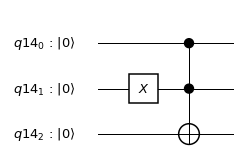

In [39]:
qub = QuantumRegister(3)
function = QuantumCircuit(qub)

#--- Função ---
function.x(qub[1])
function.ccx(qub[0], qub[1], qub[2])

function.draw()



# Implementando o Algoritmo de Grover

Agora que temos todas informações necessárias podemos de fato parti para implementação do algoritmo <br> que pode ser separado nós seguintes passos:


## Passo 1

  Nossa aplicação utilizará um vetor com 4 indices ou seja $N = 2^2$ 
  o que significa 2 qubits. Portanto o algoritmo inicial com $|0\rangle^2$
  e um qubit auxiliar para aplicação da nossa função (Oracle).
  Como o mostrado abaixo:

In [120]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
grover = QuantumCircuit(qr, cr)

## Passo 2

Nós utilizamos o Hadamard para computar as superposições.

$|\psi\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1}|x\rangle \Big(\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big)$

In [121]:
#-- indíces --
grover.h(qr[0])
grover.h(qr[1])

#---qubit auxiliar ----
grover.x(qr[2])
grover.h(qr[2])


## Passo 3

O passo três pode ser quebrado em 4 subpassos <br>
e é onde o algoritmo de fato começa <br>

1) Aplicar o oracle *O* <br>
2) Aplicar a transformação de $H^n$ de Hadamard <br>
3) Aplicar a mudança condicional de fase <br>
para todas as bases computacionais execeto para $|0\rangle$ recebendo a fase de -1 <br>
$|x\rangle \rightarrow -(-1)^{\delta_x0}|x\rangle$ <br>
4) Aplicar a transformação de $H^n$ de Hadamard novamente<br>

## Aplicando do nosso oracle

Como vimos anteriormente nós precisamos criar um circuito que implementasse<br>
nossa função (Oracle) e dessa forma sermos capazes de "marcar" o indíce que buscamos<br>
que nesse caso é 2 ou 10.<br>

**Subpasso 1**



In [122]:
#--- Função ---
grover.x(qr[1])
grover.ccx(qr[0], qr[1], qr[2])



Agora aplicaremos a transformação de Hadamard 

**Subpasso 2**



In [123]:
grover.h(qr[0])
grover.h(qr[1])

Realizando o próximo passo realizaremos a mudança condicional<br>
de fase para cada base computacional onde $|0\rangle$.<br>

**Subpasso 3**


In [124]:

grover.z(qr[0])
grover.z(qr[1])



Agora aplicaremos a transformação de Hadamard novamente

**Subpasso 4**


In [125]:
grover.h(qr[0])
grover.h(qr[1])

## Passo 3

Agora repitiremos os subpassos de 1 a 4, porque são necessárias $\sqrt{N}$ interações,<br>
onde N é tamanho do nosso vetor que no nosso caso é 4, o que nós dá 2 iterações. <br>



In [126]:
#--- Função ---
grover.x(qr[1])
grover.ccx(qr[0], qr[1], qr[2])

#---Hadamard

grover.h(qr[0])
grover.h(qr[1])


#----Troca de fase

grover.z(qr[0])
grover.z(qr[1])


#--- Hadarmard

grover.h(qr[0])
grover.h(qr[1])



## Passo 4

Agora que já fizemos as iterações necessárias vamos fazer a medição e o valor <br>
obtido deve ser o indíce que nós buscamos que nesse caso é 10 (2).

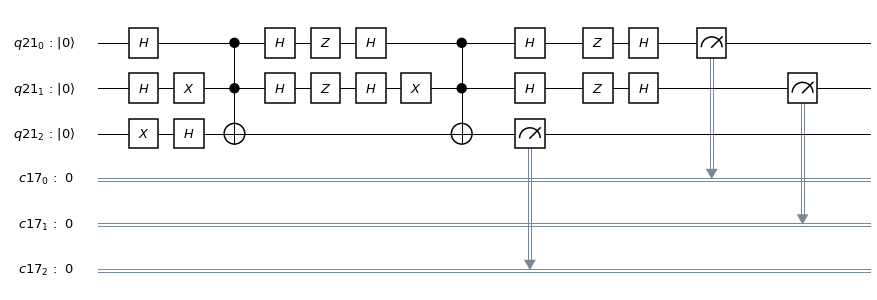

In [127]:
grover.measure(qr, cr)

grover.draw()

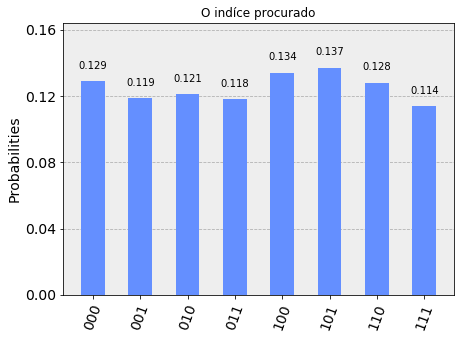

In [128]:
# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(grover, simulator).result()
counts = result.get_counts(grover)
plot_histogram(counts, title='O indíce procurado')